# Predict Whether booking  is going to cancel or not

such a machine leaning model that can predict whether a paricular booking which has been done by a user is going to cancel or not....

In [1]:
import pandas as pd    #Data Manipulation  
import numpy as np #numerical computation
import matplotlib.pyplot as plt  #Used for Visualization
#jupyter notebook specific command that let’s you see the plots in the notbook itself.
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #To avoid displaying the warnings
#warnings.warn("deprecated", DeprecationWarning)

In [2]:
#Read data from your local path.
#csv file is provided here without path, because its present in the folder where this notebook is present.
#If this file is present in some other path, then pd.read_csv('C:/users/hotel_bookings.csv')
#Path should be of your local file
df=pd.read_csv('hotel_bookings.csv')

#Displaying top 5 values in a dataframe
#for different count like top 10 or 20, etc, --> train.head(10) or train.head(20)
#for last values in dataframe --> train.tail()

df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [3]:
#shape is to obtain number of rows and columns in the dataframe.
#first index value is no. of rows and second is no. of columns
df.shape

(119390, 32)

In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory.

In [7]:
# fill the na for outlet size with mode, here its replaced dynamically
df['children']=df['children'].fillna(df['children'].mode()[0])

In [8]:
#df['country']=df['country'].fillna(df['country'].mode()[0])

In [9]:
#df['agent']=df['agent'].fillna(df['agent'].mode()[0])

In [10]:
df['company']=df['company'].fillna(df['company'].mode()[0])

In [11]:
def Random_value_imputation(feature):
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum())               
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [12]:
#Random_value_imputation('company')
Random_value_imputation('agent')
Random_value_imputation('country')

In [13]:
#count of null values for specific columns in dataframe

In [14]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [15]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
list=['children','adults','babies']   #used the list

for i in list:
    print('{} has unique values as {}'.format(i,df[i].unique()))    #used placeholder for printing the statemtens

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [17]:
### seems to have some dirtiness in data as Adults,babies & children cant be zero at a same time

In [18]:
df.shape

(119390, 32)

In [19]:
len(df[df['adults']==0])

403

In [20]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
4127    Resort Hotel            1          0               2016   
9376    Resort Hotel            1          0               2016   
31765   Resort Hotel            0         31               2016   
32029   Resort Hotel            0          4               2017   
32827   Resort Hotel            0         46               2017   
34849   Resort Hotel            0         15               2017   
34855   Resort Hotel            0         15               2017   
37459   Resort Hotel            0          1               2017   
40392     City Hotel            0        132               2015   
40922     City Hotel            0          0               2015   
41020     City Hotel            0          0               2015   
41056     City Hotel            0          0               2015   
42452     City Hotel            1          1               2015   
42591     City Hotel            0          0               2015   
42871     City Hotel            0          0               2015   
42934     City Hotel            0          4               2015   
47166     City Hotel            1          1               2016   
47180     City Hotel            0          0               2016   
47444     City Hotel            0         48               2016   
49264     City Hotel            1        173               2016   
50701     City Hotel            0        122               2016   
50702     City Hotel            0        122               2016   
54025     City Hotel            0        198               2016   
54037     City Hotel            1        244               2016   
54047     City Hotel            1        244               2016   
...              ...          ...        ...                ...   
107543    City Hotel            0          0               2017   
107594    City Hotel            0          0               2017   
107676    City Hotel            0          0               2017   
107977    City Hotel            0          0               2017   
107992    City Hotel            0          0               2017   
108233    City Hotel            0          0               2017   
108234    City Hotel            0          0               2017   
108235    City Hotel            0          0               2017   
109038    City Hotel            0          2               2017   
109945    City Hotel            0         10               2017   
110280    City Hotel            1        132               2017   
110301    City Hotel            0          7               2017   
111027    City Hotel            0          0               2017   
111042    City Hotel            0         17               2017   
111406    City Hotel            0         33               2017   
111531    City Hotel            0         35               2017   
111709    City Hotel            0         31               2017   
111710    City Hotel            0          6               2017   
111980    City Hotel            0          0               2017   
112471    City Hotel            0         75               2017   
112558    City Hotel            0          1               2017   
113188    City Hotel            0          0               2017   
114583    City Hotel            0         26               2017   
114908    City Hotel            0          1               2017   
114911    City Hotel            0          1               2017   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               201

In [21]:
### Visualise Entire Dataframe where adult,children & babies are 0

In [22]:
pd.set_option('display.max_columns',32)  #total col is 32
#set_option-Sets the value of the specified option.

In [23]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
4127    Resort Hotel            1          0               2016   
9376    Resort Hotel            1          0               2016   
31765   Resort Hotel            0         31               2016   
32029   Resort Hotel            0          4               2017   
32827   Resort Hotel            0         46               2017   
34849   Resort Hotel            0         15               2017   
34855   Resort Hotel            0         15               2017   
37459   Resort Hotel            0          1               2017   
40392     City Hotel            0        132               2015   
40922     City Hotel            0          0               2015   
41020     City Hotel            0          0               2015   
41056     City Hotel            0          0               2015   
42452     City Hotel            1          1               2015   
42591     City Hotel            0          0               2015   
42871     City Hotel            0          0               2015   
42934     City Hotel            0          4               2015   
47166     City Hotel            1          1               2016   
47180     City Hotel            0          0               2016   
47444     City Hotel            0         48               2016   
49264     City Hotel            1        173               2016   
50701     City Hotel            0        122               2016   
50702     City Hotel            0        122               2016   
54025     City Hotel            0        198               2016   
54037     City Hotel            1        244               2016   
54047     City Hotel            1        244               2016   
...              ...          ...        ...                ...   
107543    City Hotel            0          0               2017   
107594    City Hotel            0          0               2017   
107676    City Hotel            0          0               2017   
107977    City Hotel            0          0               2017   
107992    City Hotel            0          0               2017   
108233    City Hotel            0          0               2017   
108234    City Hotel            0          0               2017   
108235    City Hotel            0          0               2017   
109038    City Hotel            0          2               2017   
109945    City Hotel            0         10               2017   
110280    City Hotel            1        132               2017   
110301    City Hotel            0          7               2017   
111027    City Hotel            0          0               2017   
111042    City Hotel            0         17               2017   
111406    City Hotel            0         33               2017   
111531    City Hotel            0         35               2017   
111709    City Hotel            0         31               2017   
111710    City Hotel            0          6               2017   
111980    City Hotel            0          0               2017   
112471    City Hotel            0         75               2017   
112558    City Hotel            0          1               2017   
113188    City Hotel            0          0               2017   
114583    City Hotel            0         26               2017   
114908    City Hotel            0          1               2017   
114911    City Hotel            0          1               2017   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               201

In [24]:
#'children','adults','babies' are not zero at a time so this is noise from your dataset so use can remove this data

In [25]:
data=df[~filter]

In [26]:
data.shape

(119210, 32)

In [27]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit   31.0     40.0   
1                  C                4   No Deposit    9.0     40.0   
2                  C                0   No Deposit  240.0     40.0   
3                  A                0   No Deposit  304.0     40.0   
4                  A                0   No Deposit  240.0     40.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

# Visualization the data

##  Where do the guests come from

In [28]:
data[data['is_canceled']==0]['country'].value_counts()

PRT    21153
GBR     9718
FRA     8514
ESP     6415
DEU     6085
IRL     2555
ITA     2438
BEL     1874
NLD     1721
USA     1597
BRA     1400
CHE     1303
AUT     1035
CN      1028
SWE      796
POL      710
CHN      542
ISR      502
NOR      428
RUS      394
FIN      377
ROU      367
DNK      326
AUS      320
LUX      178
JPN      172
ARG      160
AGO      158
HUN      154
MAR      151
       ...  
ASM        1
CYM        1
ATF        1
MAC        1
SYC        1
BHR        1
MRT        1
PLW        1
PYF        1
DJI        1
SMR        1
TJK        1
SDN        1
KIR        1
SLE        1
BFA        1
LCA        1
BWA        1
FRO        1
NPL        1
DMA        1
NAM        1
MMR        1
BDI        1
GUY        1
MLI        1
BHS        1
MDG        1
ZMB        1
AIA        1
Name: country, Length: 165, dtype: int64

In [29]:
#0-invalid booking 1-valid booking
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','No of guests']  #reset your col name 
country_wise_data

country  No of guests
0       PRT         21153
1       GBR          9718
2       FRA          8514
3       ESP          6415
4       DEU          6085
5       IRL          2555
6       ITA          2438
7       BEL          1874
8       NLD          1721
9       USA          1597
10      BRA          1400
11      CHE          1303
12      AUT          1035
13       CN          1028
14      SWE           796
15      POL           710
16      CHN           542
17      ISR           502
18      NOR           428
19      RUS           394
20      FIN           377
21      ROU           367
22      DNK           326
23      AUS           320
24      LUX           178
25      JPN           172
26      ARG           160
27      AGO           158
28      HUN           154
29      MAR           151
..      ...           ...
135     ASM             1
136     CYM             1
137     ATF             1
138     MAC             1
139     SYC             1
140     BHR             1
141     MRT             1
142     PLW             1
143     PYF             1
144     DJI             1
145     SMR             1
146     TJK             1
147     SDN             1
148     KIR             1
149     SLE             1
150     BFA             1
151     LCA             1
152     BWA             1
153     FRO             1
154     NPL             1
155     DMA             1
156     NAM             1
157     MMR             1
158     BDI             1
159     GUY             1
160     MLI             1
161     BHS             1
162     MDG             1
163     ZMB             1
164     AIA             1

[165 rows x 2 columns]

In [30]:
#Folium is a Python library used for visualizing geospatial data

In [31]:

!pip install folium  


In [32]:
import folium
from folium.plugins import HeatMap

In [33]:
basemap=folium.Map()

In [34]:
country_wise_data.dtypes

country         object
No of guests     int64
dtype: object

In [35]:
!pip install plotly
import plotly.express as px

In [36]:
# show on map
#A Choropleth Map is a map composed of colored polygons. It is used to represent spatial variations of a quantity.
map_guest = px.choropleth(country_wise_data,
                    locations=country_wise_data['country'],
                    color=country_wise_data['No of guests'], #more no of guests higher the denscity of that color
                    hover_name=country_wise_data['country'], #Either a name of a column in data_frame, or a pandas Series or array_like object. Values from this column or array_like appear in bold in the hover tooltip.
                    title="Home country of guests")
map_guest.show()

In [37]:
plt.figure(figsize = (8,5))
sns.heatmap(data.corr(), linewidths = 0.5)

## How much do guests pay for a room per night?

In [38]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit   31.0     40.0   
1                  C                4   No Deposit    9.0     40.0   
2                  C                0   No Deposit  240.0     40.0   
3                  A                0   No Deposit  304.0     40.0   
4                  A                0   No Deposit  240.0     40.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [39]:
data2=data[data['is_canceled']==0]

In [40]:
# boxplot:
plt.figure(figsize=(15, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel", #which col apply the boxplot
            data=data2)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

## How much do the guests price per night ?

In [41]:
#used two dataframe resort hotel & city hotel
data_resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
data_city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [42]:
data_resort.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit   31.0     40.0   
1                  C                4   No Deposit    9.0     40.0   
2                  C                0   No Deposit  240.0     40.0   
3                  A                0   No Deposit  304.0     40.0   
4                  A                0   No Deposit  240.0     40.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [43]:
#A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [44]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [45]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')  #merge the two datafream on arrival_date_month col
final.columns=['month','price_for_resort','price_for_city_hotel']  #reset the col name
final #print

month  price_for_resort  price_for_city_hotel
0       April         75.867816            111.962267
1      August        181.205892            118.674598
2    December         68.410104             88.401855
3    February         54.147478             86.520062
4     January         48.761125             82.330983
5        July        150.122528            115.818019
6        June        107.974850            117.874360
7       March         57.056838             90.658533
8         May         76.657558            120.669827
9    November         48.706289             86.946592
10    October         61.775449            102.004672
11  September         96.416860            112.776582

In [46]:
# now we will observe over here is month column is not in order, & if we will visualise we will get improper conclusion
# so very first we have to provide right hierarchy to the month column

In [47]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

In [48]:
## !pip install sort-dataframeby-monthorweek

## Dependency package needs to be installed
## pip install sorted-months-weekdays

In [49]:
import sort_dataframeby_monthorweek as sd   #sort the month col 

In [50]:
def sort_data(df,colname):
    return sd.Sort_Dataframeby_Month(df,colname)


In [51]:
final=sort_data(final,'month')
final

month  price_for_resort  price_for_city_hotel
0     January         48.761125             82.330983
1    February         54.147478             86.520062
2       March         57.056838             90.658533
3       April         75.867816            111.962267
4         May         76.657558            120.669827
5        June        107.974850            117.874360
6        July        150.122528            115.818019
7      August        181.205892            118.674598
8   September         96.416860            112.776582
9     October         61.775449            102.004672
10   November         48.706289             86.946592
11   December         68.410104             88.401855

In [52]:
#use lineplot
px.line(final, x='month', y=['price_for_resort','price_for_city_hotel'], title='Room price per night')

In [53]:
#  This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)., The price of the city hotel varies less and is most expensive during spring and autumn.

##  in which months Guests are high?

In [54]:
data_resort.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit   31.0     40.0   
1                  C                4   No Deposit    9.0     40.0   
2                  C                0   No Deposit  240.0     40.0   
3                  A                0   No Deposit  304.0     40.0   
4                  A                0   No Deposit  240.0     40.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [55]:
data_resort['arrival_date_month'].value_counts()  #total no og Guests in this month

August       3257
July         3137
October      2575
March        2571
April        2550
May          2535
February     2308
September    2102
June         2037
December     2014
November     1975
January      1866
Name: arrival_date_month, dtype: int64

In [56]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index() 
rush_resort.columns=['month','no of guests']   #reset the col name
rush_resort

month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866

In [57]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

month  no of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249

In [58]:
final_rush=rush_resort.merge(rush_city,on='month')  #merge the both datafram on the based on the month col.
final_rush.columns=['month','no of guests in resort','no of guest in city hotel']  #reset the col. name
final_rush

month  no of guests in resort  no of guest in city hotel
0      August                    3257                       5367
1        July                    3137                       4770
2     October                    2575                       4326
3       March                    2571                       4049
4       April                    2550                       4010
5         May                    2535                       4568
6    February                    2308                       3051
7   September                    2102                       4283
8        June                    2037                       4358
9    December                    2014                       2377
10   November                    1975                       2676
11    January                    1866                       2249

In [59]:
final_rush=sort_data(final_rush,'month')  #sort the table based on the month col.
final_rush

month  no of guests in resort  no of guest in city hotel
0     January                    1866                       2249
1    February                    2308                       3051
2       March                    2571                       4049
3       April                    2550                       4010
4         May                    2535                       4568
5        June                    2037                       4358
6        July                    3137                       4770
7      August                    3257                       5367
8   September                    2102                       4283
9     October                    2575                       4326
10   November                    1975                       2676
11   December                    2014                       2377

In [60]:
final_rush.dtypes

month                        object
no of guests in resort        int64
no of guest in city hotel     int64
dtype: object

In [61]:
final_rush.columns

Index(['month', 'no of guests in resort', 'no of guest in city hotel'], dtype='object')

In [62]:
#use line plot
px.line(data_frame=final_rush, x='month', y=['no of guests in resort','no of guest in city hotel'], title='Total number of guests per Months')

## How long do people stay on this hotels?

In [63]:
filter=data['is_canceled']==0
clean_data=data[filter]

In [64]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit   31.0     40.0   
1                  C                4   No Deposit    9.0     40.0   
2                  C                0   No Deposit  240.0     40.0   
3                  A                0   No Deposit  304.0     40.0   
4                  A                0   No Deposit  240.0     40.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [65]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

In [66]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  ...  \
0   BB     PRT         Direct               Direct  ...   
1   BB     PRT         Direct               Direct  ...   
2   BB     GBR         Direct               Direct  ...   
3   BB     GBR      Corporate            Corporate  ...   
4   BB     GBR      Online TA                TA/TO  ...   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   C   
1                       0                               0                   C   
2                       0                               0                   A   
3                       0                               0                   A   
4                       0                               0                   A   

  assigned_room_type booking_changes  deposit_type  agent  company  \
0                  C               3    No Deposit   31.0     40.0   
1                  C               4    No Deposit    9.0     40.0   
2                  C               0    No Deposit  240.0     40.0   
3                  A               0    No Deposit  304.0     40.0   
4                  A               0    No Deposit  240.0     40.0   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0      Transient   0.0                            0   
1                     0      Transient   0.0                            0   
2                     0      Transient  75.0                            0   
3                     0      Transient  75.0                            0   
4                     0      Transient  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0           Check-Out                7/1/2015   
1                          0           Check-Out                7/1/2015   
2                          0           Check-Out                7/2/2015   
3                          0           Check-Out                7/2/2015   
4                          1           Check-Out                7/3/2015   

  total_nights  
0            0  
1            0  
2            1  
3            1  
4            2  

[5 rows x 33 columns]

In [67]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay.head()

total_nights         hotel  is_canceled
0             0    City Hotel          251
1             0  Resort Hotel          371
2             1    City Hotel         9155
3             1  Resort Hotel         6579
4             2    City Hotel        10983

In [68]:
stay=stay.rename(columns={'is_canceled':'Number of stays'})
stay.head()

total_nights         hotel  Number of stays
0             0    City Hotel              251
1             0  Resort Hotel              371
2             1    City Hotel             9155
3             1  Resort Hotel             6579
4             2    City Hotel            10983

In [69]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "Number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)

### Select important Features using Co-relation

In [70]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit   31.0     40.0   
1                  C                4   No Deposit    9.0     40.0   
2                  C                0   No Deposit  240.0     40.0   
3                  A                0   No Deposit  304.0     40.0   
4                  A                0   No Deposit  240.0     40.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [71]:
co_relation=data.corr()   #find the Co-relation
co_relation

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.292876           0.016622   
lead_time                          0.292876   1.000000           0.040334   
arrival_date_year                  0.016622   0.040334           1.000000   
arrival_date_week_number           0.008315   0.127046          -0.540373   
arrival_date_day_of_month         -0.005948   0.002306          -0.000121   
stays_in_weekend_nights           -0.001323   0.085985           0.021694   
stays_in_week_nights               0.025542   0.166892           0.031203   
adults                             0.058182   0.117575           0.030266   
children                           0.004851  -0.037878           0.054710   
babies                            -0.032569  -0.021003          -0.013192   
is_repeated_guest                 -0.083745  -0.123209           0.010281   
previous_cancellations             0.110139   0.086025          -0.119905   
previous_bookings_not_canceled    -0.057365  -0.073599           0.029234   
booking_changes                   -0.144832   0.002230           0.031416   
agent                             -0.072903  -0.060461           0.054593   
company                           -0.076731  -0.074127           0.039492   
days_in_waiting_list               0.054301   0.170008          -0.056348   
adr                                0.046492  -0.065018           0.198429   
required_car_parking_spaces       -0.195701  -0.116624          -0.013812   
total_of_special_requests         -0.234877  -0.095949           0.108610   

                                arrival_date_week_number  \
is_canceled                                     0.008315   
lead_time                                       0.127046   
arrival_date_year                              -0.540373   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066572   
stays_in_weekend_nights                         0.018629   
stays_in_week_nights                            0.016047   
adults                                          0.026567   
children                                        0.005556   
babies                                          0.010417   
is_repeated_guest                              -0.031125   
previous_cancellations                          0.035493   
previous_bookings_not_canceled                 -0.021009   
booking_changes                                 0.006311   
agent                                          -0.025213   
company                                        -0.032937   
days_in_waiting_list                            0.022677   
adr                                             0.076281   
required_car_parking_spaces                     0.001980   
total_of_special_requests                       0.026202   

                                arrival_date_day_of_month  \
is_canceled                                     -0.005948   
lead_time                                        0.002306   
arrival_date_year                               -0.000121   
arrival_date_week_number                         0.066572   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016225   
stays_in_week_nights                            -0.028362   
adults                                          -0.001754   
children                                         0.014550   
babies                                          -0.000235   
is_repeated_guest                               -0.006471   
previous_cancellations                          -0.027027   
previous_bookings_not_canceled                  -0.000306   
booking_changes                                  0.011266   
agent                                            0.002747   
company                                          0.004796   
days_in_waiting_list                             0.022532   
adr                                              0.0302

In [72]:
plt.figure(figsize = (17,8))
data.corr()
sns.heatmap(data.corr(),annot=True)

In [73]:
co_relation=data.corr()["is_canceled"]  #Co-relation of the is_canceled col.
co_relation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.072903
company                          -0.076731
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [74]:
co_relation.abs().sort_values(ascending=False)  #replace the -ve from Co-relation on the is_canceled col

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.076731
agent                             0.072903
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [75]:
co_relation.abs().sort_values(ascending=False)[1:]    

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.076731
agent                             0.072903
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [76]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [77]:
data.groupby("is_canceled")["reservation_status"].value_counts()   

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [78]:
list_not=['days_in_waiting_list','arrival_date_year']

In [79]:
#using List-comp.
num_features=[col for col in data.columns if data[col].dtype!='O' and col not in list_not]  #display the how many col is numeric 
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [80]:
cat_not=['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country','days_in_waiting_list']

In [81]:
cat_features=[col for col in data.columns if data[col].dtype=='O' and col not in cat_not]  #display how many object col
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [82]:
data_cat=data[cat_features]

In [83]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient                7/1/2015  
1                  C   No Deposit     Transient                7/1/2015  
2                  A   No Deposit     Transient                7/2/2015  
3                  A   No Deposit     Transient                7/2/2015  
4                  A   No Deposit     Transient                7/3/2015

In [84]:
#converting the reservation_status_date col

In [85]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [86]:
data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])

In [87]:
data_cat['year']=data_cat['reservation_status_date'].dt.year
data_cat['month']=data_cat['reservation_status_date'].dt.month
data_cat['day']=data_cat['reservation_status_date'].dt.day

In [88]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  year  \
0                  C   No Deposit     Transient              2015-07-01  2015   
1                  C   No Deposit     Transient              2015-07-01  2015   
2                  A   No Deposit     Transient              2015-07-02  2015   
3                  A   No Deposit     Transient              2015-07-02  2015   
4                  A   No Deposit     Transient              2015-07-03  2015   

   month  day  
0      7    1  
1      7    1  
2      7    2  
3      7    2  
4      7    3

In [89]:
data_cat.drop('reservation_status_date',axis=1,inplace=True)  #drop the reservation_status_date col.

In [90]:
data_cat['cancellation']=data['is_canceled']  #adding the col. cancellation is_canceled col. is int but output canceled the room or not so 

In [91]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type  year  month  day  \
0                  C   No Deposit     Transient  2015      7    1   
1                  C   No Deposit     Transient  2015      7    1   
2                  A   No Deposit     Transient  2015      7    2   
3                  A   No Deposit     Transient  2015      7    2   
4                  A   No Deposit     Transient  2015      7    3   

   cancellation  
0             0  
1             0  
2             0  
3             0  
4             0

In [92]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day', 'cancellation'],
      dtype='object')

### Feature Encoding

In [93]:
from sklearn.preprocessing import LabelEncoder
#Initialize the labelEncoder
le=LabelEncoder()

In [94]:
#converting categorical values to numerical
data_cat['arrival_date_month']=le.fit_transform(data_cat['arrival_date_month'])

In [95]:
data_cat['meal']=le.fit_transform(data_cat['meal'])

In [96]:
data_cat['distribution_channel']=le.fit_transform(data_cat['distribution_channel'])

In [97]:
data_cat['reserved_room_type']=le.fit_transform(data_cat['reserved_room_type'])

In [98]:
data_cat['deposit_type']=le.fit_transform(data_cat['deposit_type'])

In [99]:
data_cat['customer_type']=le.fit_transform(data_cat['customer_type'])

In [100]:
data_cat['arrival_date_month']=le.fit_transform(data_cat['arrival_date_month'])

In [101]:
data_cat.head()

hotel  arrival_date_month  meal market_segment  \
0  Resort Hotel                   5     0         Direct   
1  Resort Hotel                   5     0         Direct   
2  Resort Hotel                   5     0         Direct   
3  Resort Hotel                   5     0      Corporate   
4  Resort Hotel                   5     0      Online TA   

   distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                     1                   2             0              2   
1                     1                   2             0              2   
2                     1                   0             0              2   
3                     0                   0             0              2   
4                     3                   0             0              2   

   year  month  day  cancellation  
0  2015      7    1             0  
1  2015      7    1             0  
2  2015      7    2             0  
3  2015      7    2             0  
4  2015      7    3             0

In [102]:
#One-hot encoding, creating unique row values as a column
dummy=pd.get_dummies(data_cat['market_segment'])
dummy.head()

Aviation  Complementary  Corporate  Direct  Groups  Offline TA/TO  \
0         0              0          0       1       0              0   
1         0              0          0       1       0              0   
2         0              0          0       1       0              0   
3         0              0          1       0       0              0   
4         0              0          0       0       0              0   

   Online TA  Undefined  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          1          0

In [103]:
#concatinating dataframes
#axis=1 is applying on column
data_cat=pd.concat([data_cat,dummy],axis=1)

In [104]:
data_cat.head()

hotel  arrival_date_month  meal market_segment  \
0  Resort Hotel                   5     0         Direct   
1  Resort Hotel                   5     0         Direct   
2  Resort Hotel                   5     0         Direct   
3  Resort Hotel                   5     0      Corporate   
4  Resort Hotel                   5     0      Online TA   

   distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                     1                   2             0              2   
1                     1                   2             0              2   
2                     1                   0             0              2   
3                     0                   0             0              2   
4                     3                   0             0              2   

   year  month  day  cancellation  Aviation  Complementary  Corporate  Direct  \
0  2015      7    1             0         0              0          0       1   
1  2015      7    1             0         0              0          0       1   
2  2015      7    2             0         0              0          0       1   
3  2015      7    2             0         0              0          1       0   
4  2015      7    3             0         0              0          0       0   

   Groups  Offline TA/TO  Online TA  Undefined  
0       0              0          0          0  
1       0              0          0          0  
2       0              0          0          0  
3       0              0          0          0  
4       0              0          1          0

In [105]:
data_cat.dtypes

hotel                   object
arrival_date_month       int64
meal                     int32
market_segment          object
distribution_channel     int32
reserved_room_type       int32
deposit_type             int32
customer_type            int32
year                     int64
month                    int64
day                      int64
cancellation             int64
Aviation                 uint8
Complementary            uint8
Corporate                uint8
Direct                   uint8
Groups                   uint8
Offline TA/TO            uint8
Online TA                uint8
Undefined                uint8
dtype: object

In [106]:
# got to drop all the object types features, which are not important or unprocessed.
data_cat = data_cat.drop(['hotel','market_segment'], axis=1)

In [107]:
data_cat.head()

arrival_date_month  meal  distribution_channel  reserved_room_type  \
0                   5     0                     1                   2   
1                   5     0                     1                   2   
2                   5     0                     1                   0   
3                   5     0                     0                   0   
4                   5     0                     3                   0   

   deposit_type  customer_type  year  month  day  cancellation  Aviation  \
0             0              2  2015      7    1             0         0   
1             0              2  2015      7    1             0         0   
2             0              2  2015      7    2             0         0   
3             0              2  2015      7    2             0         0   
4             0              2  2015      7    3             0         0   

   Complementary  Corporate  Direct  Groups  Offline TA/TO  Online TA  \
0              0          0       1       0              0          0   
1              0          0       1       0              0          0   
2              0          0       1       0              0          0   
3              0          1       0       0              0          0   
4              0          0       0       0              0          1   

   Undefined  
0          0  
1          0  
2          0  
3          0  
4          0

In [108]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [109]:
dataframe.head()

arrival_date_month  meal  distribution_channel  reserved_room_type  \
0                   5     0                     1                   2   
1                   5     0                     1                   2   
2                   5     0                     1                   0   
3                   5     0                     0                   0   
4                   5     0                     3                   0   

   deposit_type  customer_type  year  month  day  cancellation  Aviation  \
0             0              2  2015      7    1             0         0   
1             0              2  2015      7    1             0         0   
2             0              2  2015      7    2             0         0   
3             0              2  2015      7    2             0         0   
4             0              2  2015      7    3             0         0   

   Complementary  Corporate  Direct  Groups  Offline TA/TO  ...  \
0              0          0       1       0              0  ...   
1              0          0       1       0              0  ...   
2              0          0       1       0              0  ...   
3              0          1       0       0              0  ...   
4              0          0       0       0              0  ...   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   booking_changes  agent  company   adr  required_car_parking_spaces  \
0                3   31.0     40.0   0.0                            0   
1                4    9.0     40.0   0.0                            0   
2                0  240.0     40.0  75.0                            0   
3                0  304.0     40.0  75.0                            0   
4                0  240.0     40.0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  

[5 rows x 36 columns]

In [110]:
dataframe.dtypes

arrival_date_month                  int64
meal                                int32
distribution_channel                int32
reserved_room_type                  int32
deposit_type                        int32
customer_type                       int32
year                                int64
month                               int64
day                                 int64
cancellation                        int64
Aviation                            uint8
Complementary                       uint8
Corporate                           uint8
Direct                              uint8
Groups                              uint8
Offline TA/TO                       uint8
Online TA                           uint8
Undefined                           uint8
is_canceled                         int64
lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights              

In [111]:
dataframe.drop('cancellation',axis=1,inplace=True)

In [112]:
dataframe.shape

(119210, 35)

In [113]:
dataframe.head()

arrival_date_month  meal  distribution_channel  reserved_room_type  \
0                   5     0                     1                   2   
1                   5     0                     1                   2   
2                   5     0                     1                   0   
3                   5     0                     0                   0   
4                   5     0                     3                   0   

   deposit_type  customer_type  year  month  day  Aviation  Complementary  \
0             0              2  2015      7    1         0              0   
1             0              2  2015      7    1         0              0   
2             0              2  2015      7    2         0              0   
3             0              2  2015      7    2         0              0   
4             0              2  2015      7    3         0              0   

   Corporate  Direct  Groups  Offline TA/TO  Online TA  ...  \
0          0       1       0              0          0  ...   
1          0       1       0              0          0  ...   
2          0       1       0              0          0  ...   
3          1       0       0              0          0  ...   
4          0       0       0              0          1  ...   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   booking_changes  agent  company   adr  required_car_parking_spaces  \
0                3   31.0     40.0   0.0                            0   
1                4    9.0     40.0   0.0                            0   
2                0  240.0     40.0  75.0                            0   
3                0  304.0     40.0  75.0                            0   
4                0  240.0     40.0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  

[5 rows x 35 columns]

### Handle Outliers

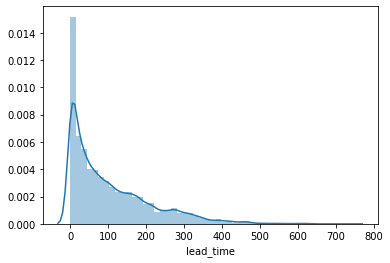

In [114]:
sns.distplot(dataframe['lead_time'])

In [115]:
#Boxplot is used to remove outliers from the dataframe
Q1 = dataframe['lead_time'].quantile(0.25)
Q3 = dataframe['lead_time'].quantile(0.75)
IQR = Q3 - Q1
#Dataframe is filtered and assigned to new dataframe by providing the range
#here @Q1,@IQR,etc is replaced dynamically
handle_outlier = dataframe.query('(@Q1 - 1.5 * @IQR) <= lead_time <= (@Q3 + 1.5 * @IQR)')

In [116]:
print("min::",(Q1-(1.5*IQR)))
print("max::",(Q3+(1.5*IQR)))

min:: -196.5
max:: 375.5


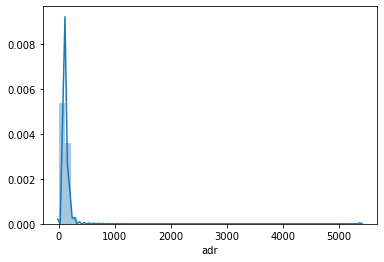

In [117]:
sns.distplot(dataframe['adr'])

In [118]:

#Boxplot is used to remove outliers from the dataframe

Q1 = dataframe['adr'].quantile(0.25)
Q3 = dataframe['adr'].quantile(0.75)
IQR = Q3 - Q1
#Dataframe is filtered and assigned to new dataframe by providing the range
#here @Q1,@IQR,etc is replaced dynamically
handle_outlier = dataframe.query('(@Q1 - 1.5 * @IQR) <= adr <= (@Q3 + 1.5 * @IQR)')

In [119]:
print("min::",(Q1-(1.5*IQR)))
print("max::",(Q3+(1.5*IQR)))

min:: -15.25
max:: 210.75


In [120]:
dataframe.isnull().sum()

arrival_date_month                0
meal                              0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
Aviation                          0
Complementary                     0
Corporate                         0
Direct                            0
Groups                            0
Offline TA/TO                     0
Online TA                         0
Undefined                         0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations      

In [121]:
dataframe.dropna(inplace=True)

In [122]:
## separate dependent & independent features
y=dataframe['is_canceled']
x=dataframe.drop('is_canceled',axis=1)

### Feature Importance

In [123]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [124]:
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [125]:
feature_sel_model.get_support()

array([ True, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True])

In [126]:
x.columns

Index(['arrival_date_month', 'meal', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year', 'month',
       'day', 'Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA', 'Undefined', 'lead_time',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [127]:
cols=x.columns

In [128]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = cols[(feature_sel_model.get_support())]

In [129]:
# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 34
selected features: 19


In [130]:
selected_feat

Index(['arrival_date_month', 'deposit_type', 'year', 'month', 'day',
       'Offline TA/TO', 'Online TA', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'previous_cancellations', 'booking_changes',
       'agent', 'company', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [131]:
x=x[selected_feat]

### splitting dataset & model Building

In [132]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [133]:
#Dimensions of each type after splitting
print (x.shape)
print (y.shape)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(119210, 19)
(119210,)
(89407, 19)
(29803, 19)
(89407,)
(29803,)


In [134]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred=logreg.predict(x_test)

In [136]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[17414,  1210],
       [ 4471,  6708]], dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score


0.8093816058786029

### Cross validate your model

In [138]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

In [139]:
score

array([0.74249287, 0.729469  , 0.79649358, 0.71923496, 0.83457764,
       0.75060817, 0.76277158, 0.80815368, 0.78005201, 0.75218121])

In [140]:
score.mean()

0.7676034702486177

# multiple Algos

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [142]:
### classifier models
models = []
models.append(('********LogisticRegression**********', LogisticRegression()))
models.append(('********RandomForest***********', RandomForestClassifier()))
models.append(('********Decision Tree**********', DecisionTreeClassifier()))

In [143]:


for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    # Make predictions.
    predictions = model.predict(x_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print('Confusion_matrix=\n',confusion_matrix(predictions, y_test))
    print('\n')
    
    from sklearn.metrics import accuracy_score
    print('Accuracy_score=\n',accuracy_score(predictions,y_test))
    print('\n')

********LogisticRegression**********
Confusion_matrix=
 [[17414  4471]
 [ 1210  6708]]


Accuracy_score=
 0.8093816058786029


********RandomForest***********
Confusion_matrix=
 [[18487  1361]
 [  137  9818]]


Accuracy_score=
 0.9497366036976144


********Decision Tree**********
Confusion_matrix=
 [[17924   662]
 [  700 10517]]


Accuracy_score=
 0.9542999026943596


